# Step 3 - 1D diffusion

#### Differential equation to be solved

Solve equation

$$
\frac{\partial u(t, x)}{\partial t} = \nu \, \frac{\partial^{2} u(t, x)}{\partial x^{2}}
$$

by using forward differences in time and central differences in space: 

$$
\frac{\partial u(t, x)}{\partial t} \approx \frac{u^{n+1}_{i} - u^{n}_{i}}{\Delta t} \quad ,
$$

$$
\frac{\partial^{2} u(t, x)}{\partial x^{2}} \approx \frac{u^{n}_{i+1} - 2 \, u^{n}_{i} + u^{n}_{i-1}}{\Delta x^{2}} \quad ,
$$

where $u^{n}_{i} \equiv u(t_{n}, x_{i})$. The resulting discrete equation is:

$$
u^{n+1}_{i} = u^{n}_{i} + \nu \, \frac{\Delta t}{\Delta x^{2}} \left( u^{n}_{i+1} - 2 \, u^{n}_{i} + u^{n}_{i-1} \right) \quad .
$$

#### Initial conditions

At $t = 0$, 

$
u(t = 0, x) = u_{0}(x) \quad ,
$

where

$u_{0}(x) = 2$ for $0.5 \le x \le 1$

and

$u_{0}(x) = 1$ everywhere else in $(0, 2)$ .

#### Boundary conditions

$u = 1$ at $x = 0$ and $x = 2$ . 

### Import required stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Implementation

In [5]:
def diffusion_1D(u0, dt, nt, dx, nx, v):
    
    u = np.copy(u0)
    
    cte = v*dt/dx/dx

    # loop in time
    for n in range(nt):
        un = u.copy()
        # loop in space
        for i in range(1, nx-1): # iterate from 1 to nx
            u[i] = un[i] + cte * (un[i+1] - 2*un[i] + un[i-1])
    
    return u

In [9]:
nt = 500
dt = 0.001
v = 0.1

nx = [20, 40, 60, 80, 100, 120]
u = []
x = []
u0 = []

for nxi in nx:
    dx = 2/(nxi - 1)
    u0i = np.ones(nxi)
    u0i[int(0.5/dx):int(1/dx)+1] = 2
    u0.append(u0i)
    u.append(diffusion_1D(u0i, dt, nt, dx, nxi, v))
    x.append(np.linspace(0, 2, nxi))

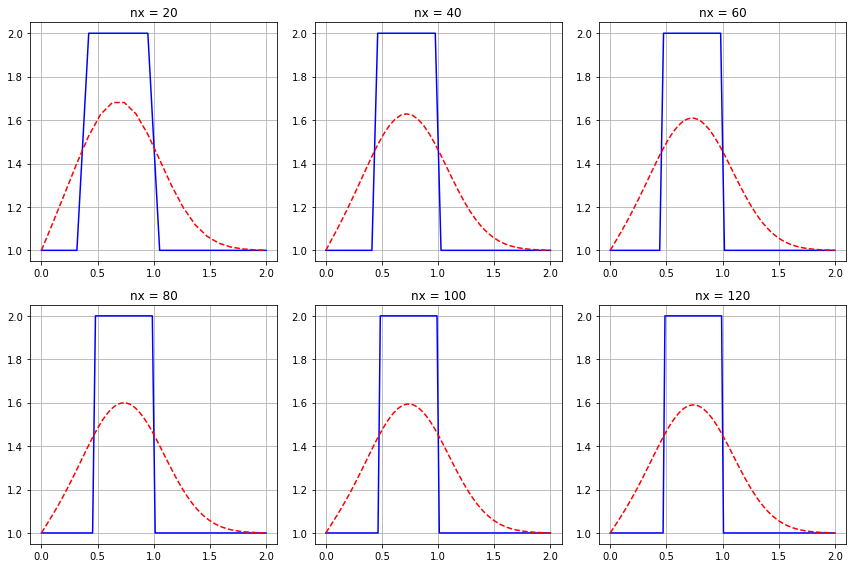

In [10]:
plt.figure(figsize=(12,8))

for i, (nxi, xi, u0i, ui) in enumerate(zip(nx, x, u0, u)):

    plt.subplot(2,3,i+1)
    plt.title('nx = %d' % (nxi))
    plt.plot(xi, u0i, '-b')
    plt.plot(xi, ui, '--r')
    plt.grid()

plt.tight_layout()
plt.show()